## Police Killings

The Guardian launched “The Counted,” an impressive interactive database of Americans killed by police since the start of the year. It started in 2015, but you can check the recent stats for 2016. We will explore the data by race, income and state.

### Assignment

- Import the data and examine the head and columns
- Get the total counts for each racial grouping
- Find the relative % for each racial grouping
- How do the killings compare with the overall US breakdown of population by race?

Encoded in ISO-8859-1

### Imports

In [1]:
import os
import os.path as osp

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Load Data

In [2]:
data = pd.read_csv(osp.join('..','data', 'police_killings.csv'))
data.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [3]:
data.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

### Total Killings By Ratial Group

In [4]:
counts = data.groupby(data.raceethnicity).count()
counts

,name,age,gender,month,day,year,streetaddress,city,state,latitude,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
raceethnicity,,,,,,,,,,,,,,,,,,,,,
Asian/Pacific Islander,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Black,135,135,135,135,135,135,134,135,135,135,...,135,135,133,135,133,128,133,135,133,133
Hispanic/Latino,67,67,67,67,67,67,66,67,67,67,...,67,67,67,67,67,66,67,67,67,67
Native American,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Unknown,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,14,15,15,15,15
White,236,236,236,236,236,236,234,236,236,236,...,236,236,236,236,236,218,236,236,236,236


### Display Killings By Ratial Group as Percentages

In [5]:
percent_counts = counts.name / counts.name.sum() * 100
percent_counts

raceethnicity
Asian/Pacific Islander     2.141328
Black                     28.907923
Hispanic/Latino           14.346895
Native American            0.856531
Unknown                    3.211991
White                     50.535332
Name: name, dtype: float64

### USA Ratial Group Break Down

From [infoplease](http://www.infoplease.com/ipa/A0762156.html) for the 2010 Census

In [6]:
us_race = pd.Series({
    'Asian/Pacific Islander': 14465124 + 481576,
    'Black': 37685848,
    'Hispanic/Latino': 50477594,
    'Native American': 2247098,
    'Unknown': 604265,
    'White': 196817552,
}, name='raceethnicity')
us_race = us_race.to_frame()
us_race

,raceethnicity
Asian/Pacific Islander,14946700
Black,37685848
Hispanic/Latino,50477594
Native American,2247098
Unknown,604265
White,196817552


### USA Ratial Percentage Break Down

In [7]:
us_race['percent'] = us_race.raceethnicity / us_race.raceethnicity.sum() * 100
us_race

,raceethnicity,percent
Asian/Pacific Islander,14946700,4.936504
Black,37685848,12.446650
Hispanic/Latino,50477594,16.671428
Native American,2247098,0.742158
Unknown,604265,0.199573
White,196817552,65.003687


### Compare Killings to USA Break Down

In [8]:
compare_percent = pd.concat([percent_counts, us_race.percent], axis=1)
compare_percent.columns = ['killings_percent', 'us_percent']
compare_percent['difference'] = compare_percent.killings_percent - compare_percent.us_percent
compare_percent

,killings_percent,us_percent,difference
raceethnicity,,,
Asian/Pacific Islander,2.141328,4.936504,-2.795176
Black,28.907923,12.446650,16.461273
Hispanic/Latino,14.346895,16.671428,-2.324533
Native American,0.856531,0.742158,0.114373
Unknown,3.211991,0.199573,3.012419
White,50.535332,65.003687,-14.468356


### Assignment

- Graph the killings by race using a bar chart. Make sure to label the graph and axes
- Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
- Calculate the median "p_income"

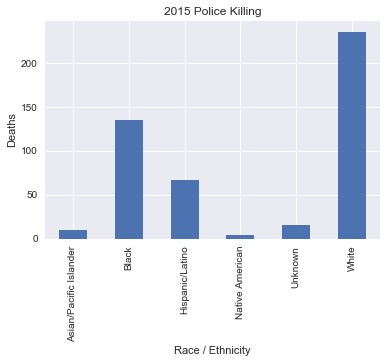

In [9]:
ax = counts.name.plot(kind='bar', title='2015 Police Killing');

ax.set_xlabel('Race / Ethnicity');
ax.set_ylabel('Deaths');

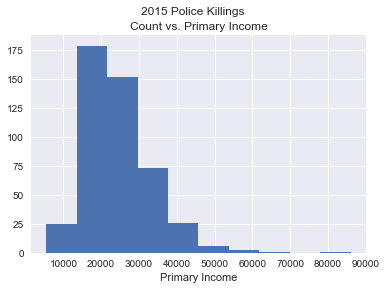

In [10]:
data.loc[data.p_income == '-', 'p_income'] = None

ax = data.p_income.astype(float).hist();
ax.set_xlabel('Primary Income');
plt.suptitle('2015 Police Killings');
ax.set_title('Count vs. Primary Income');

### Median Primary Income

In [11]:
data.p_income.median()

22348.0

### Assignment

- Find the total killings per each state
- Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic" 
- Convert the values in those columns to float types
- Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
    
    lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
    
    highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

### Killings Per State

In [12]:
states = data.groupby(data.state).count()
states.name

state
AK     2
AL     8
AR     4
AZ    25
CA    74
CO    12
CT     1
DC     1
DE     2
FL    29
GA    16
HI     4
IA     2
ID     4
IL    11
IN     8
KS     6
KY     7
LA    11
MA     5
MD    10
ME     1
MI     9
MN     6
MO    10
MS     6
MT     2
NC    10
NE     6
NH     1
NJ    11
NM     5
NV     3
NY    14
OH    10
OK    22
OR     8
PA     7
SC     9
TN     6
TX    46
UT     5
VA     9
WA    11
WI     5
WV     2
WY     1
Name: name, dtype: int64

### Mean Calculations

In [34]:
interest_groups = ('share_black', 'share_hispanic', 'share_white')
lowest_states = ("CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI")
highest_states = ("OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE")

new_data = data.copy()
for group in interest_groups:
    new_data.loc[data[group] == '-', group] = None
    new_data.loc[:, group] = new_data[group].astype(float)

In [62]:
def mean_field(field, states):
    """Return the mean field for the provided states.
    
    :param str field: field of interest
    :param iter states: states of interest
    :returns: mean population
    :rtype: list
    """
    mean_pop = []
    for group in interest_groups:
        sub_group = new_data[field][new_data.state.isin(states) & new_data[group]]
        mean_pop.append(sub_group.mean())
    return mean_pop

In [63]:
population = []
county_income = []
for area in (lowest_states, highest_states):
    population.append(mean_field('pop', area))
    county_income.append(mean_field('county_income', area))

### Mean Population

In [70]:
report = '{}:\t{:.3f}'
print('Lowest States Mean Population\n')
for group, mean in zip(interest_groups, population[0]):
    print(report.format(group, mean))
    
print('\n\n')

print('Highest States Mean Population\n')
for group, mean in zip(interest_groups, population[1]):
    print(report.format(group, mean))

Lowest States Mean Population

share_black:	4183.241
share_hispanic:	4212.352
share_white:	4238.382



Highest States Mean Population

share_black:	4168.524
share_hispanic:	4341.451
share_white:	4315.750


### Mean County Income

In [69]:
report = '{}:\t${:.2f}'
print('Lowest States Mean Population\n')
for group, mean in zip(interest_groups, county_income[0]):
    print(report.format(group, mean))
    
print('\n\n')

print('Highest States Mean Population\n')
for group, mean in zip(interest_groups, county_income[1]):
    print(report.format(group, mean))

Lowest States Mean Population

share_black:	$55190.94
share_hispanic:	$54959.93
share_white:	$55031.33



Highest States Mean Population

share_black:	$49108.11
share_hispanic:	$48892.41
share_white:	$48706.97
